In [37]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
img = cv2.imread("unbordered_example.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_height, img_width = img.shape
img.shape

(980, 1632)

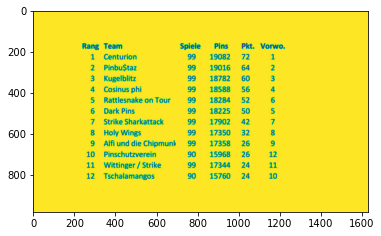

In [39]:
plt.imshow(img)
plt.show()

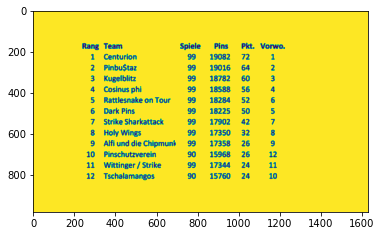

In [40]:
# img_bin = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5, 5)
thresh, img_bin = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY)
plt.imshow(img_bin)
plt.show()

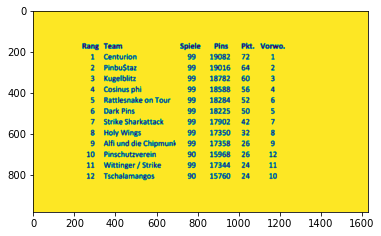

In [41]:
img_median = cv2.medianBlur(img_bin, 3)
plt.imshow(img_median)
plt.show()

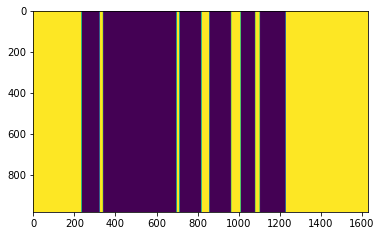

In [42]:
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, img_height*2)) #shape (kernel_len, 1) inverted! xD
vertical_lines = cv2.erode(img_median, ver_kernel, iterations=1)
plt.imshow(vertical_lines)
plt.show()

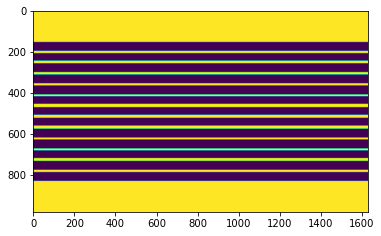

In [43]:
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (img_width*2, 9)) #shape (kernel_len, 1) inverted! xD
horizontal_lines = cv2.erode(img_median, hor_kernel, iterations=1)
plt.imshow(horizontal_lines)
plt.show()

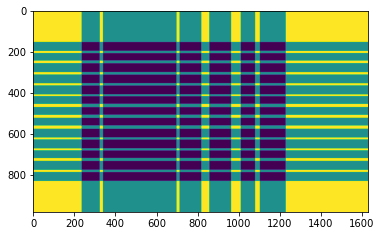

In [44]:
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
plt.imshow(img_vh)
plt.show()

In [45]:
img_vh

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [46]:
~img_vh

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

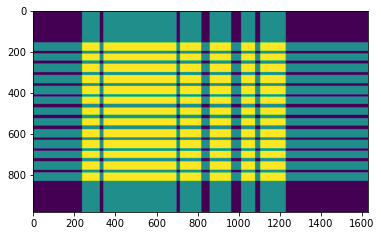

In [47]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
plt.imshow(img_vh)
plt.show()

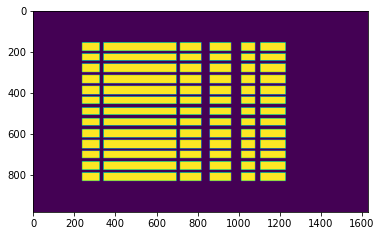

In [48]:
thresh, img_vh = cv2.threshold(img_vh, 128, 255, cv2.THRESH_BINARY )
plt.imshow(img_vh)
plt.show()

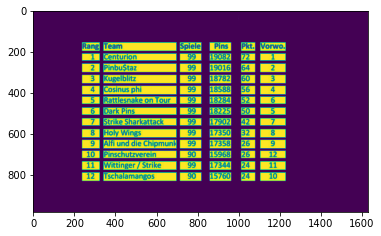

In [49]:
bitxor = cv2.bitwise_xor(img, img_vh)
bitnot = cv2.bitwise_not(bitxor)
plt.imshow(bitnot)
plt.show()

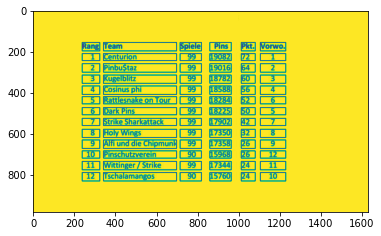

In [50]:
contours, hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)


# Sort all the contours by top to bottom.
contours, boundingBoxes = sort_contours(contours, method="top-to-bottom")

# Creating a list of heights for all detected boxes
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]

# Get mean of heights
mean = np.mean(heights)

# Create list box to store all boxes in
box = []
# Get position (x,y), width and height for every contour and show the contour on image
#print("lencontours", len(contours))
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    #print("x", x, "y", y, "w", w, "h", h)
    if (w < 0.9*img_width and h < 0.9*img_height):
        image = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        box.append([x, y, w, h])
        
plt.imshow(image)
plt.show()

In [51]:
box

[[1107, 157, 124, 41],
 [1014, 157, 68, 41],
 [861, 157, 104, 41],
 [716, 157, 104, 41],
 [343, 157, 356, 41],
 [239, 157, 86, 41],
 [1107, 211, 124, 34],
 [1014, 211, 68, 34],
 [861, 211, 104, 34],
 [716, 211, 104, 34],
 [343, 211, 356, 34],
 [239, 211, 86, 34],
 [1107, 260, 124, 41],
 [1014, 260, 68, 41],
 [861, 260, 104, 41],
 [716, 260, 104, 41],
 [343, 260, 356, 41],
 [239, 260, 86, 41],
 [1107, 315, 124, 40],
 [1014, 315, 68, 40],
 [861, 315, 104, 40],
 [716, 315, 104, 40],
 [343, 315, 356, 40],
 [239, 315, 86, 40],
 [1107, 368, 124, 41],
 [1014, 368, 68, 41],
 [861, 368, 104, 41],
 [716, 368, 104, 41],
 [343, 368, 356, 41],
 [239, 368, 86, 41],
 [1107, 420, 124, 35],
 [1014, 420, 68, 35],
 [861, 420, 104, 35],
 [716, 420, 104, 35],
 [343, 420, 356, 35],
 [239, 420, 86, 35],
 [1107, 473, 124, 35],
 [1014, 473, 68, 35],
 [861, 473, 104, 35],
 [716, 473, 104, 35],
 [343, 473, 356, 35],
 [239, 473, 86, 35],
 [1107, 525, 124, 35],
 [1014, 525, 68, 35],
 [861, 525, 104, 35],
 [716, 52

In [52]:
row = []
column = []
j = 0

# Sorting the boxes to their respective row and column
for i in range(len(box)):
    if (i == 0):
        column.append(box[i])
        previous = box[i]

    else:
        if (box[i][1] <= previous[1] + mean / 2):
            column.append(box[i])
            previous = box[i]

            if (i == len(box) - 1):
                row.append(column)

        else:
            row.append(column)
            column = []
            previous = box[i]
            column.append(box[i])
            
len(row), len(column)

(13, 6)

In [53]:
row

[[[1107, 157, 124, 41],
  [1014, 157, 68, 41],
  [861, 157, 104, 41],
  [716, 157, 104, 41],
  [343, 157, 356, 41],
  [239, 157, 86, 41]],
 [[1107, 211, 124, 34],
  [1014, 211, 68, 34],
  [861, 211, 104, 34],
  [716, 211, 104, 34],
  [343, 211, 356, 34],
  [239, 211, 86, 34]],
 [[1107, 260, 124, 41],
  [1014, 260, 68, 41],
  [861, 260, 104, 41],
  [716, 260, 104, 41],
  [343, 260, 356, 41],
  [239, 260, 86, 41]],
 [[1107, 315, 124, 40],
  [1014, 315, 68, 40],
  [861, 315, 104, 40],
  [716, 315, 104, 40],
  [343, 315, 356, 40],
  [239, 315, 86, 40]],
 [[1107, 368, 124, 41],
  [1014, 368, 68, 41],
  [861, 368, 104, 41],
  [716, 368, 104, 41],
  [343, 368, 356, 41],
  [239, 368, 86, 41]],
 [[1107, 420, 124, 35],
  [1014, 420, 68, 35],
  [861, 420, 104, 35],
  [716, 420, 104, 35],
  [343, 420, 356, 35],
  [239, 420, 86, 35]],
 [[1107, 473, 124, 35],
  [1014, 473, 68, 35],
  [861, 473, 104, 35],
  [716, 473, 104, 35],
  [343, 473, 356, 35],
  [239, 473, 86, 35]],
 [[1107, 525, 124, 35],
  [

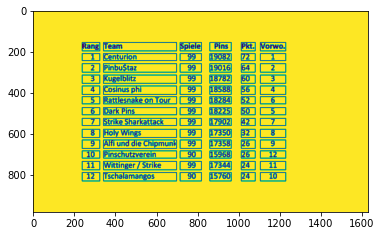

In [54]:
# checking the results
for i in range(len(row)):
    for j in range(len(row[i])):
        image = cv2.rectangle(img_bin, (row[i][j][0], row[i][j][1]), ((row[i][j][0] + row[i][j][2], row[i][j][1] + row[i][j][3])), (0, 0, 0), 2)
        
plt.imshow(image)
plt.show()